In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *

ModuleNotFoundError: No module named 'cvxpy'

In [2]:
!pip install cvxpy --user

  Using cached https://files.pythonhosted.org/packages/82/d5/0b787694c85297e36d3afd4c8574973809a7cc52aa2c602413012da8999d/cvxpy-1.0.21.tar.gz
  Using cached https://files.pythonhosted.org/packages/07/a7/0b19c8f9476a4762d296c6c5fa860f2fe580a4f579fa53aaa8515f4ca217/scs-2.1.0.tar.gz
  Running setup.py bdist_wheel for cvxpy ... error
  Complete output from command /opt/anaconda/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-jk244k3z/cvxpy/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-buq1x2lw --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/cvxpy
  copying cvxpy/settings.py -> build/lib.linux-x86_64-3.7/cvxpy
  copying cvxpy/error.py -> build/lib.linux-x86_64-3.7/cvxpy
  copying cvxpy/__init__.py -> build/lib.linux-x86_64-3.7

  cvxpy/cvxcore/src/../include/Eigen/src/Core/CwiseNullaryOp.h:501:10:   required from ‘Derived& Eigen::DenseBase<Derived>::setZero() [with Derived = Eigen::Matrix<int, -1, 1>]’
  cvxpy/cvxcore/src/../include/Eigen/src/SparseCore/SparseMatrix.h:949:5:   required from ‘void Eigen::internal::set_from_triplets(const InputIterator&, const InputIterator&, SparseMatrixType&, int) [with InputIterator = __gnu_cxx::__normal_iterator<Eigen::Triplet<double>*, std::vector<Eigen::Triplet<double> > >; SparseMatrixType = Eigen::SparseMatrix<double>]’
  cvxpy/cvxcore/src/../include/Eigen/src/SparseCore/SparseMatrix.h:1013:30:   required from ‘void Eigen::SparseMatrix<_Scalar, _Flags, _Index>::setFromTriplets(const InputIterators&, const InputIterators&) [with InputIterators = __gnu_cxx::__normal_iterator<Eigen::Triplet<double>*, std::vector<Eigen::Triplet<double> > >; _Scalar = double; int _Options = 0; _Index = int]’
  cvxpy/cvxcore/src/LinOp.hpp:125:71:   required from here
  cvxpy/cvxcore/src/../in

  Running setup.py bdist_wheel for scs ... error
  Complete output from command /opt/anaconda/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-jk244k3z/scs/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-wph1vhpr --python-tag cp37:
  Namespace(blas64=False, extraverbose=False, float32=False, gpu=False, int32=False, scs=False)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/scs
  copying src/__init__.py -> build/lib.linux-x86_64-3.7/scs
  running build_ext
  mkl_info:
      libraries = ['mkl_rt', 'pthread']
      library_dirs = ['/opt/anaconda/lib']
      define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
      include_dirs = ['/opt/anaconda/include']
  blas_mkl_info:
      libraries = ['mkl_rt', 'pthread']
      library_dirs = ['/op

Command "/opt/anaconda/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-jk244k3z/scs/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-record-rhgf1g8y/install-record.txt --single-version-externally-managed --compile --user --prefix=" failed with error code 1 in /tmp/pip-install-jk244k3z/scs/


In [12]:
def obj_func(m):
    svd = np.linalg.svd(m, compute_uv=False)

    return np.sum(svd) 

def get_min_knowns(n):

    rank = 2

    U = np.random.randn(n, rank)
    V = np.random.randn(n, rank)
    original = np.dot(U, V.T)

    for knowns in range(1, n*n):
        max_steps = 100000
        threshold = 1 # distance between solution and answer when they are considered the same

        unknowns = n*n - knowns

        mask = np.array([0] * unknowns + [1] * (n*n - unknowns))
        mask = np.ma.make_mask(mask)

        np.random.shuffle(mask)
        mask = np.reshape(mask, [n,n])

        
        # First try Newton's method:

        def comp_grad(m, boolMask, obj_func):
            """ Computes gradient that maximizes the objective function """
            epsilon = 1e-3

            # Yes, grad is a vector now
            grad = []

            for i in range(n):
                for j in range(n):
                    if boolMask[i,j] and np.random.random() > 1 - portion:
                        diff = np.zeros([n,n])
                        diff[i,j] = epsilon
                        grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))

            return grad

        def comp_hessian(m, boolMask, of):
            """ Computes hessian (only diagonal) """
            epsilon = 1e-3

            hessian = []

            for i in range(n):
                for j in range(n):
                    if boolMask[i,j]:
                        row = []

                        diff = np.zeros([n,n])
                        diff[i,j] = epsilon
                        hessian.append((of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2)

            return hessian


        starting_point = np.copy(original)

        boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
        starting_point[boolMask] = 0

        prev_norm = np.linalg.norm(starting_point,'nuc')

        norms = []
        distances = []
        sing_vals = []

        current_point = starting_point

        #pl.imshow(np.abs((current_point-original)/original), cmap=plt.get_cmap('hot'),
        #          interpolation='nearest', vmin=0, vmax=1)
        #pl.colorbar()


        initial_s = 4
        s = 4
        portion = 1.1
        for i in range(max_steps):
            cur_norm = np.linalg.norm(current_point,'nuc')
            norms.append(cur_norm)
            sing_vals.append(np.linalg.svd(current_point, compute_uv=False))
            distances.append(np.linalg.norm(current_point-original,'fro'))
            diff = cur_norm - prev_norm

            # portion really should depend on s since smaller s implies the need of a more accurate gradient estimate
            #portion = 1 - np.exp(-1/(20*s))
            #if i % 1000 == 0:
            #print(i, cur_norm, diff, np.linalg.norm(current_point-original,'fro'), initial_s, s, portion)
            prev_norm = cur_norm
            
            if np.linalg.norm(current_point-original,'fro') < threshold:
                return knowns
            
            if diff >= 0 and i > 1:
                break

            ### slowest part of the code ###
            descent = np.linalg.lstsq(np.diag(comp_hessian(current_point,boolMask,obj_func)),
               comp_grad(current_point,boolMask,obj_func), rcond=None)[0]

            descent_matrix = np.zeros([n,n])
            count = 0
            for i in range(n):
                for j in range(n):
                    if boolMask[i,j]:
                        descent_matrix[i,j] = descent[count]
                        count = count + 1

            reg = 0.39
            next_point = current_point - reg*descent_matrix

            current_point = next_point

        # Next try gradient descent:
        
        def comp_grad(m,boolMask):
            """ Computes gradient that maximizes the objective function """
            epsilon = 1e-3

            grad = np.zeros([n,n])

            for i in range(n):
                for j in range(n):
                    if boolMask[i,j]:
                        diff = np.zeros([n,n])
                        diff[i,j] = epsilon
                        grad[i,j] = (obj_func(m + diff) - obj_func(m - diff))/(2*epsilon)

            return grad
        
        def line_search(point, grad, obj_func, s = 4, threshold = 1e-10):
            """ Finds a maximum step size that maximizes the descent (since computing gradient is hard) """

            choice = point - grad * s
            while obj_func(choice) > obj_func(point):
                s = s / 2
                choice = point - grad * s

            initial_s = s

            while True:
                left = choice + grad * s/2
                right = point - grad * s/2

                s = s / 2
                if obj_func(left) < obj_func(right):
                    choice = left
                else:
                    choice = right

                if np.abs(obj_func(left) - obj_func(right)) < threshold:
                    break

            return (choice, initial_s, s)

        starting_point = np.copy(original)

        boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))
        starting_point[boolMask] = 0

        prev_norm = np.linalg.norm(starting_point,'nuc')

        norms = []
        distances = []
        sing_vals = []

        current_point = starting_point

        initial_s = 4
        s = 4
        portion = 1.1
        for i in range(threshold):
            cur_norm = np.linalg.norm(current_point,'nuc')
            norms.append(cur_norm)
            sing_vals.append(np.linalg.svd(current_point, compute_uv=False))
            distances.append(np.linalg.norm(current_point-original,'fro'))
            diff = cur_norm - prev_norm

            #print(i, cur_norm, diff, np.linalg.norm(current_point-original,'fro'))
            prev_norm = cur_norm
            
            if np.linalg.norm(current_point-original,'fro') < threshold:
                return knowns
            
            if diff >= 0 and i > 1:
                break

            ### slowest part of the code ###
            grad = comp_grad(current_point,boolMask)
            current_point, initial_s, s = line_search(current_point, grad, obj_func, s = initial_s)

    return False

In [ ]:
n_vals = []
min_knowns_vals = []

for n in range(4,10000):
    min_knowns = get_min_knowns(n)
    if min_knowns:
        n_vals.append(n)
        min_knowns_vals.append(min_knowns)
        print(n, min_knowns)

5 21
6 29
7 44
8 49
9 71
10 97
11 101
12 142


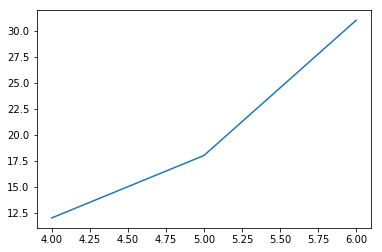

In [14]:
plt.plot(n_vals, min_knowns_vals)